In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('MBA.csv')
df

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,NaN,590.0,5.0,Other,NaN


In [42]:
df.duplicated().sum()

np.int64(0)

In [43]:
df.isnull().sum()

application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64

In [44]:
df.shape

(6194, 10)

In [45]:
df_train = df[df['admission'].notnull()]

In [46]:
df_train.shape

(1000, 10)

In [47]:
df_train = df_train[df_train['race'].notnull()]

In [48]:
df_train.shape

(692, 10)

In [49]:
df = df_train
df

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
6,7,Female,False,2.93,STEM,Other,590.0,3.0,Technology,Admit
12,13,Female,False,3.24,Humanities,Hispanic,640.0,6.0,PE/VC,Waitlist
14,15,Female,False,3.03,STEM,White,600.0,5.0,Technology,Admit
16,17,Female,False,3.32,Business,Asian,710.0,5.0,PE/VC,Admit
...,...,...,...,...,...,...,...,...,...,...
6150,6151,Female,False,3.46,Business,Asian,680.0,5.0,Investment Banking,Admit
6152,6153,Female,False,3.31,Business,Black,690.0,3.0,Other,Admit
6168,6169,Female,False,3.21,STEM,White,680.0,5.0,Consulting,Admit
6175,6176,Female,False,3.38,Humanities,Hispanic,680.0,3.0,Technology,Admit


In [50]:
df_train['gender'] = df_train['gender'].map({'Male': 0, 'Female': 1})
df_train['international'] = df_train['international'].map({False: 0, True: 1})
df_train['admission'] = df_train['admission'].map({'Admit': 1})
df_train = df[df['admission'].notnull()].copy()


In [51]:
df_train = pd.get_dummies(df_train, columns=['major', 'race', 'work_industry'], drop_first=True)

In [52]:
df = df_train

In [53]:
df

,application_id,gender,international,gpa,gmat,work_exp,admission,major_Humanities,major_STEM,race_Black,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,1,1,0,3.30,620.0,3.0,1.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,7,1,0,2.93,590.0,3.0,1.0,False,True,False,...,False,False,False,False,False,False,False,False,False,True
14,15,1,0,3.03,600.0,5.0,1.0,False,True,False,...,False,False,False,False,False,False,False,False,False,True
16,17,1,0,3.32,710.0,5.0,1.0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
20,21,0,0,3.46,760.0,5.0,1.0,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6150,6151,1,0,3.46,680.0,5.0,1.0,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6152,6153,1,0,3.31,690.0,3.0,1.0,False,False,True,...,False,False,False,False,False,True,False,False,False,False
6168,6169,1,0,3.21,680.0,5.0,1.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6175,6176,1,0,3.38,680.0,3.0,1.0,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [54]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [55]:
X = df.drop(columns=['application_id', 'admission'])  # drop ID and target
y = df['admission']
y.isnull().sum()


np.int64(0)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)  # max_depth optional to prevent overfitting
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Accuracy: 1.0


C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


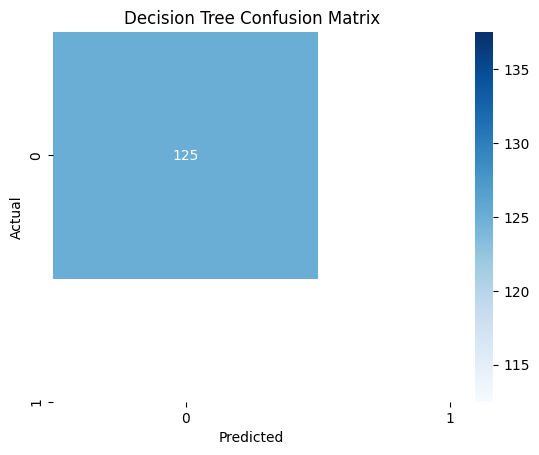

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       125

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



In [58]:
y_pred = dt_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Detailed Classification Report
print(classification_report(y_test, y_pred))

In [59]:
cv_scores = cross_val_score(dt_model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV score: 1.0
